<a href="https://colab.research.google.com/github/Julianpucheta/HCSPD2022/blob/main/Clase_2_HCSPD_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pegar código del script en Python que simula el circuito RLC

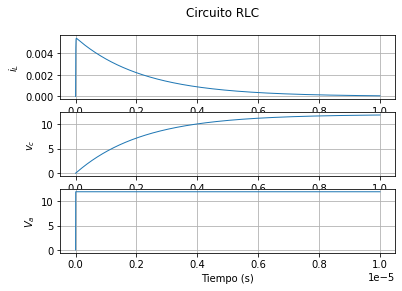

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
#h=1e-4;t_simul=1e-1;R=2.2e2;L=100e-3;C=10.0e-6;
h=1e-9;t_simul=1e-5;R=2.2e3;L=10e-6;C=1.00e-9;
A=np.array([[-R/L, -1/L],[1/C,0]])
B=np.array([[1/L],[0]])
x1=np.linspace(0,0,int(t_simul/h))
x2=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
Va=np.array([0])
x=np.array([[0],[0]])
xp=np.array([[0],[0]])
####x2=x1 ojo , porque queda igualado para todo el programa
for ii in range(int(t_simul/h)):
  xp=np.matmul(A, x)+B*Va
  x=x+xp*h
  u[ii] = Va
  Va = 12
  x1[ii] = x[0]
  x2[ii] = x[1]
  t[ii] = ii*h
##end
fig, axs = plt.subplots(3)
fig.suptitle('Circuito RLC')
axs[0].plot(t, x1, linewidth =1.0)
axs[0].grid( True )
axs[0].set_ylabel('$i_L$')
axs[1].plot(t, x2, linewidth =1.0)
axs[1].set_ylabel('$v_c$')
axs[1].grid( True )
##plot(t, x2, linewidth =1.0)
axs[2].plot(t, u, linewidth =1.0)
axs[2].grid( True )
axs[2].set_ylabel('$V_a$')
axs[2].set_xlabel('Tiempo (s)')
##title('Motor CC')
grid( True )
show()

Copiar el texto del script y llevarlo al GitHub. Editar el archivo RLC en https://github.com/Julianpucheta/HCSPD2022/blob/main/RLC.py y generar un Pull-Request en una nueva rama (New-Branch).



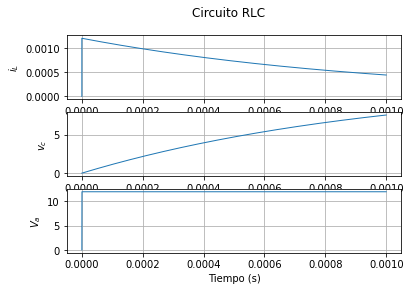

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
h=1e-9;t_simul=1e-3;R=10e3;L=10e-6;C=100e-9;
##h=1e-9;t_simul=1e-3;R=2.2e3;L=10e-6;C=100e-9;
##
A=np.array([[-R/L, -1/L],[1/C,0]])
B=np.array([[1/L],[0]])
x1=np.linspace(0,0,int(t_simul/h))
x2=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
Va=np.array([0])
x=np.array([[0],[0]])
xp=np.array([[0],[0]])
####x2=x1 ojo , porque queda igualado para todo el programa
for ii in range(int(t_simul/h)):
  xp=np.matmul(A, x)+B*Va
  x=x+xp*h
  u[ii] = Va
  Va = 12
  x1[ii] = x[0]
  x2[ii] = x[1]
  t[ii] = ii*h
##end
fig, axs = plt.subplots(3)
fig.suptitle('Circuito RLC')
axs[0].plot(t, x1, linewidth =1.0)
axs[0].grid( True )
axs[0].set_ylabel('$i_L$')
axs[1].plot(t, x2, linewidth =1.0)
axs[1].set_ylabel('$v_c$')
axs[1].grid( True )
##plot(t, x2, linewidth =1.0)
axs[2].plot(t, u, linewidth =1.0)
axs[2].grid( True )
axs[2].set_ylabel('$V_a$')
axs[2].set_xlabel('Tiempo (s)')
##title('Motor CC')
grid( True )
show()

# **Implementación** en Script .m para correr en Colabs de simulación de sistemas no lineales mediante Euler.


In [ ]:
#Instalo el Octave para Linux
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave is already the newest version (4.2.2-1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [24]:
%%writefile Controlador.m
warning('off','all');
clc;clear all;
m=.1;Fricc=0.1; long=0.6;g=9.8;M=.5;
h=0.0001;tiempo=(10/h);p_pp=0;tita_pp=0; t=0:h:tiempo*h;
omega(1)=0;p_p=0:h:tiempo*h; u=linspace(0,0,tiempo+1);
%Condiciones iniciales
alfa(1)=pi-0.8; color='b';
p(1)=0; p_p(1)=0; u(1)=0; p(1)=0; i=1;
%Versión linealizada en el equilibrio estable. Sontag Pp 104.
%estado=[p(i); p_p(i); alfa(i); omega(i)]
Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 -Fricc/(long*M) -g*(m+M)/(long*M) 0]
Mat_B=[0; 1/M; 0; 1/(long*M)]
XOP=[0 0 pi 0]';x=[0 0 alfa(1) 0]';
while(i<(tiempo+1))
 %Variables del sistema no lineal
 estado=[p(i); p_p(i); alfa(i); omega(i)];
 u(i)=0;
 %Sistema no lineal
 p_pp=(1/(M+m))*(u(i)-m*long*tita_pp*cos(alfa(i))+m*long*omega(i)^2*sin(alfa(i))-Fricc*p_p(i));
 tita_pp=(1/long)*(g*sin(alfa(i))-p_pp*cos(alfa(i)));
 p_p(i+1)=p_p(i)+h*p_pp;
 p(i+1)=p(i)+h*p_p(i);
 omega(i+1)=omega(i)+h*tita_pp;
 alfa(i+1)=alfa(i)+h*omega(i);
 %Variables del sistema lineal
 pl(i)=x(1); p_pl(i)=x(2);alfal(i)=x(3);omegal(i)=x(4);
 %Sistema lineal
 xp=Mat_A*(x-XOP)+Mat_B*u(i);
 x=x+h*xp;
 i=i+1;
end
pl(i)=x(1); p_pl(i)=x(2);alfal(i)=x(3);omegal(i)=x(4);
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
hold on;
subplot(3,2,1);plot(t,omega,color);grid on; title('Velocidad Angulo');hold on;plot(t,omegal,'k');
subplot(3,2,2);plot(t,alfa,color);hold on;plot(t,pi*ones(size(t)),'k');plot(t,alfal,'k'); grid on;title('Angulo');hold on;
subplot(3,2,3); plot(t,p,color);grid on;title('Posicion carro'); hold on;plot(t,pl,'k');
subplot(3,2,4);plot(t,p_p,color);grid on;title('Velocidad carro'); hold on;plot(t,p_pl,'k');
subplot(3,1,3);plot(t,u,color);grid on;title('Accion de control');xlabel('Tiempo en Seg.');hold on;
hfig2 = figure(2); set(hfig2, 'Visible', 'off');
hold on;
subplot(2,2,1);plot(alfa,omega,color);grid on;xlabel('Angulo');ylabel('Velocidad angular');hold on;
subplot(2,2,1);plot(alfal,omegal,'k');
subplot(2,2,2);plot(p,p_p,color);grid on;xlabel('Posicion carro');ylabel('Velocidad carro');hold on;
subplot(2,2,2);plot(pl,p_pl,'k');
print(hfig1,'Fig_1','-dpng');
print(hfig2,'Fig_2','-dpng');
save('Datos_Controlador.mat','-v7');

Overwriting Controlador.m


Mat_A =

    0.00000    1.00000    0.00000    0.00000
    0.00000   -0.20000   -1.96000    0.00000
    0.00000    0.00000    0.00000    1.00000
    0.00000   -0.33333  -19.60000    0.00000

Mat_B =

   0.00000
   2.00000
   0.00000
   3.33333



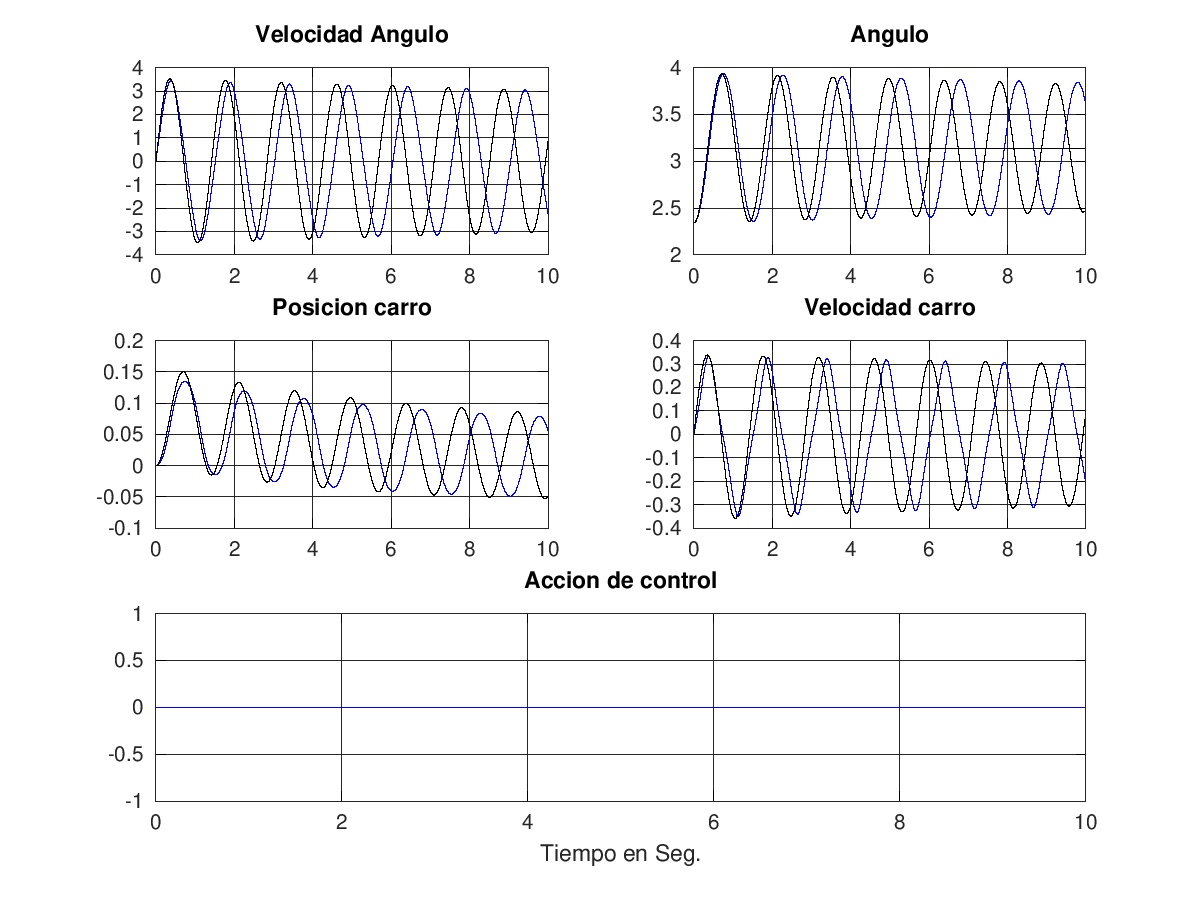

In [25]:
# -W : no window system
!octave -W Controlador.m
import scipy.io
mat = scipy.io.loadmat('/content/Datos_Controlador.mat')
from PIL import Image
imt1 = Image.open("/content/Fig_1.png")
imt1

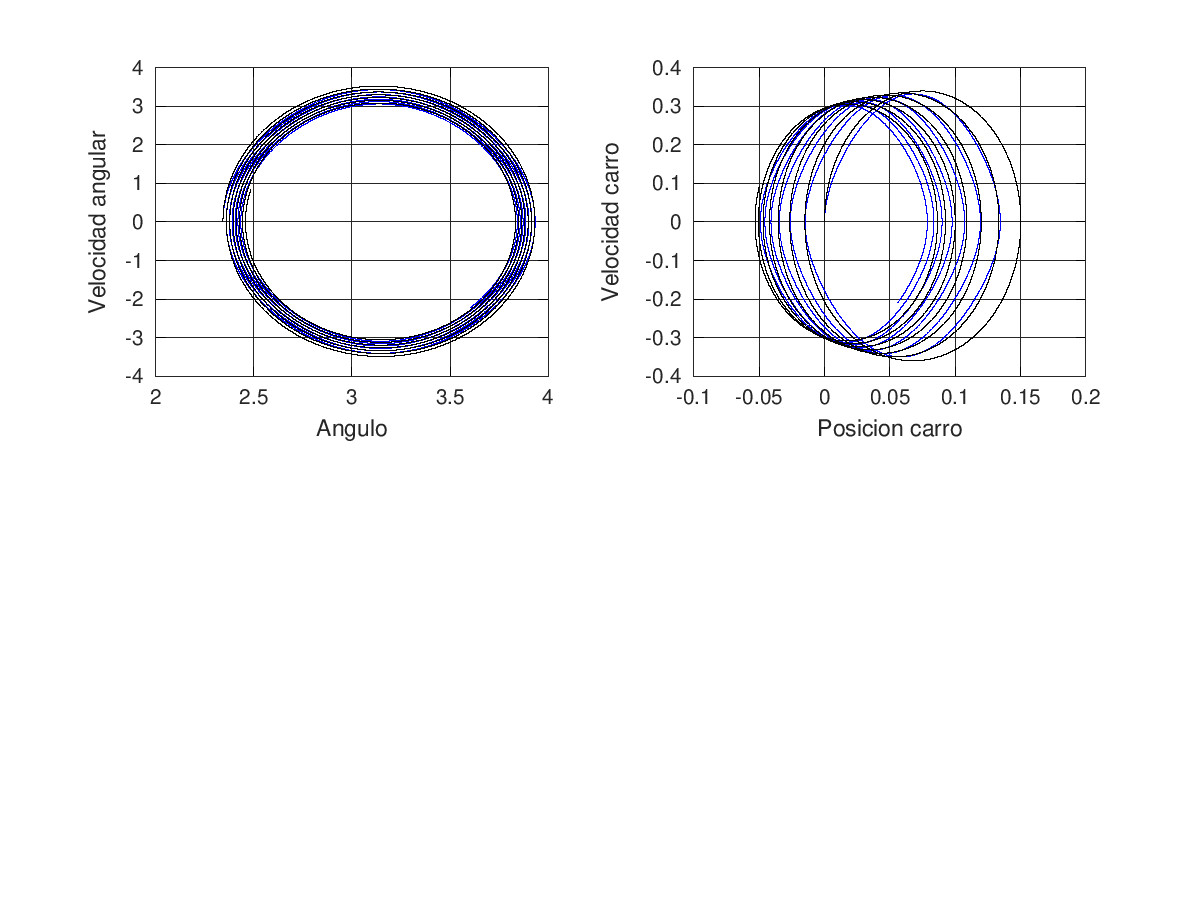

In [26]:
imt2 = Image.open("/content/Fig_2.png")
imt2